In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

images_dir = 'images_2'

In [2]:

df = pandas.read_csv(
    'results2.csv',
    #'results.csv',
    delimiter=';', 
    index_col=False,
    names=['time', 'filename', 'rows', 'strategy', 'nSim', 'piecesPlaced', 'solution_found', 'depth'])

# correct incorrectly recorded depth when score reached
df.loc[df['solution_found'] == 1, 'depth'] = df['rows'] * df['rows'] 

In [3]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth
0,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,100,6176,0,10
1,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,100,6176,0,10
2,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,200,11796,0,10
3,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,200,11796,0,10
4,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,500,28633,0,10
...,...,...,...,...,...,...,...,...
3601,20-05-15 21:59:05,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,1000,1432132,0,51
3602,20-05-15 22:02:26,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,2000,2528307,0,42
3603,20-05-15 22:06:19,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,2000,3024021,0,56
3604,20-05-15 22:25:35,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,10000,14524839,0,51


In [4]:

df['pieces'] = df['rows'] * df['rows']

In [5]:
df['score'] = df['depth'] / df['pieces']

In [6]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth,pieces,score
0,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,100,6176,0,10,16,0.625000
1,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,100,6176,0,10,16,0.625000
2,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,200,11796,0,10,16,0.625000
3,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,200,11796,0,10,16,0.625000
4,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,500,28633,0,10,16,0.625000
...,...,...,...,...,...,...,...,...,...,...
3601,20-05-15 21:59:05,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,1000,1432132,0,51,81,0.629630
3602,20-05-15 22:02:26,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,2000,2528307,0,42,81,0.518519
3603,20-05-15 22:06:19,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,2000,3024021,0,56,81,0.691358
3604,20-05-15 22:25:35,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,10000,14524839,0,51,81,0.629630


In [43]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth,pieces,score
0,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,100,6176,0,10,16,0.625000
1,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,100,6176,0,10,16,0.625000
2,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,200,11796,0,10,16,0.625000
3,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,200,11796,0,10,16,0.625000
4,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,500,28633,0,10,16,0.625000
...,...,...,...,...,...,...,...,...,...,...
3601,20-05-15 21:59:05,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,1000,1432132,0,51,81,0.629630
3602,20-05-15 22:02:26,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,2000,2528307,0,42,81,0.518519
3603,20-05-15 22:06:19,generate_puzzles2/RandPuzzle9x9_50.txt,9,avgDepth,2000,3024021,0,56,81,0.691358
3604,20-05-15 22:25:35,generate_puzzles2/RandPuzzle9x9_50.txt,9,maxDepth,10000,14524839,0,51,81,0.629630


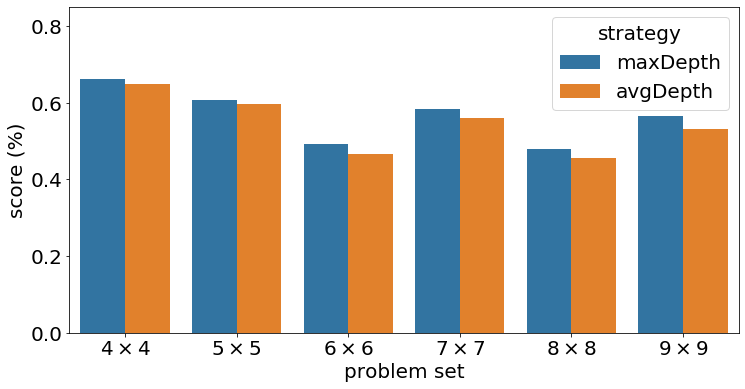

In [97]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
# matplotlib.rc('text', usetex=False)
ax = sns.barplot(x='pieces', y='score', hue='strategy',
                 data=df,
                 palette={'maxDepth': "C0", 'avgDepth': "C1"}, ci=None)
ax.set(xlabel='problem set', ylabel='score (%)')
xlabels = [r'$4 \times 4$', r'$5 \times 5$', r'$6 \times 6$',
           r'$7 \times 7$', r'$8 \times 8$', r'$9 \times 9$']
ax.set_xticklabels(xlabels)
ax.set_ylim([0, 0.85])

plt.rcParams["figure.figsize"] = (12,6)
plt.savefig(images_dir + '/pieces_vs_score.png')
plt.show()

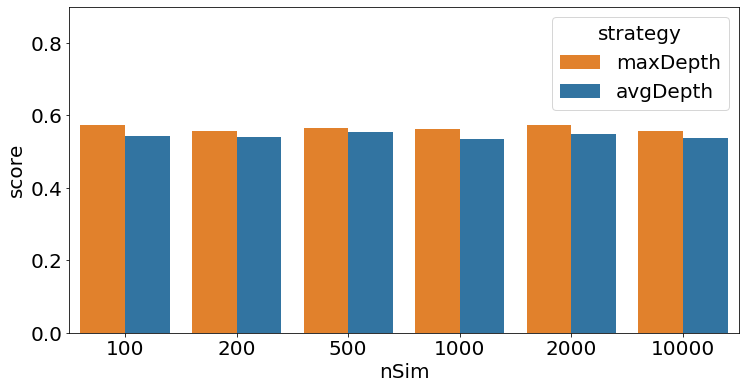

In [52]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='nSim', y='score', hue='strategy', data=df,
                 palette={'maxDepth': "C1", 'avgDepth': "C0"},
                 ci=None)

ax.set(ylim=[0, 0.9])
plt.savefig(images_dir + '/max_vs_avg.png')

In [53]:
df.groupby('nSim').mean()

,rows,piecesPlaced,solution_found,depth,pieces,score
nSim,,,,,,
100,6.491694,5.626321e+04,0.031561,24.375415,45.069767,0.558649
200,6.491694,1.076595e+05,0.029900,23.897010,45.069767,0.547702
500,6.491694,2.690720e+05,0.034884,24.421927,45.069767,0.559180
1000,6.500000,5.290348e+05,0.035000,23.898333,45.166667,0.549344
2000,6.500000,1.064165e+06,0.035000,24.555000,45.166667,0.561457
10000,6.500000,5.235907e+06,0.033333,23.771667,45.166667,0.546674


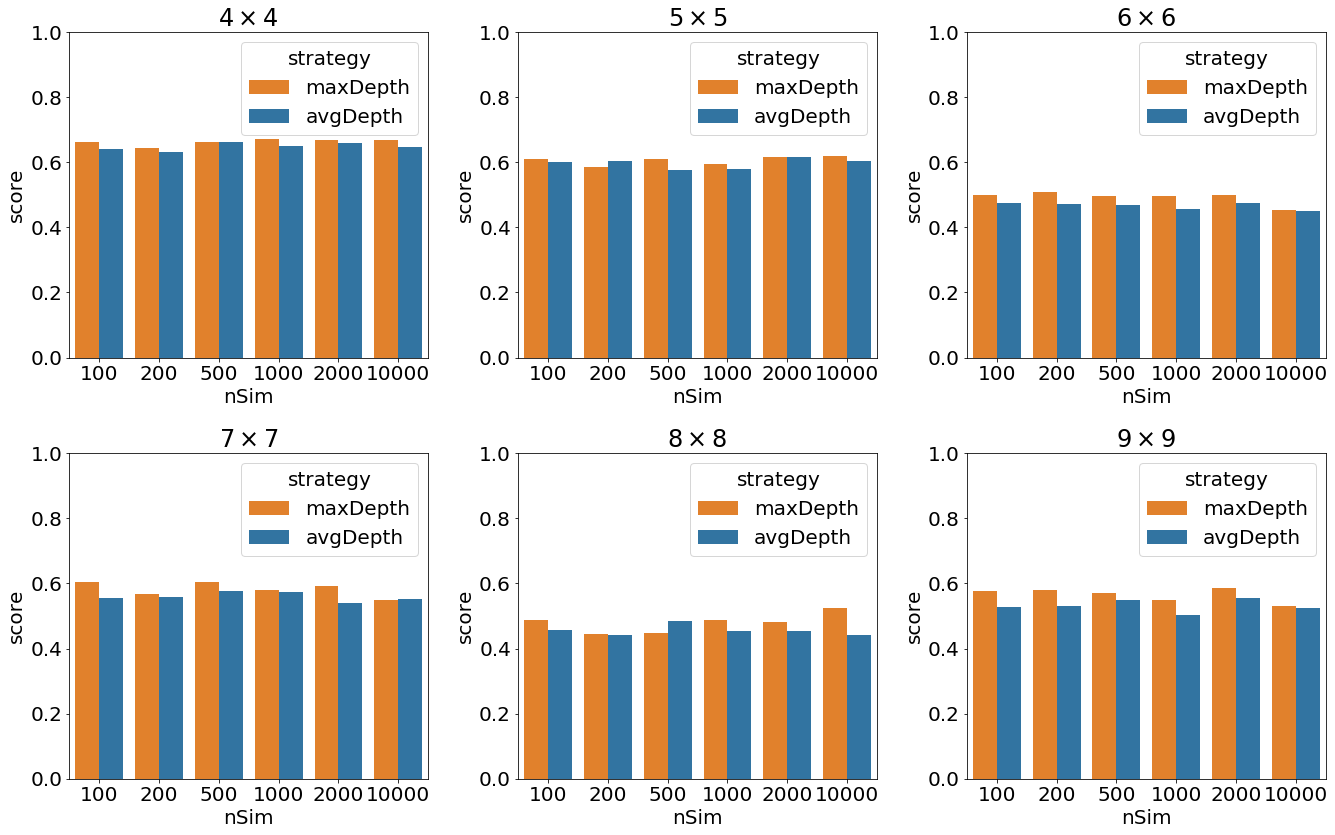

In [65]:
import math
cols = 3
f, axes = plt.subplots(2, cols, figsize=(19, 12))
for i, pieces in enumerate(sorted(list(set(df['pieces'])))):
    _df = df[df['pieces'] == pieces]
    ax = sns.barplot(x='nSim', y='score', hue='strategy', data=_df,
                     palette={'maxDepth': "C1", 'avgDepth': "C0"},
                     ci=None, ax=axes[i // cols][i %cols])
    dim = int(math.sqrt(pieces))
    title = r'${}\times{}$'.format(dim, dim)
    ax.set_title(title)
    ax.set(ylim=[0, 1])
# f.delaxes(axes[1, 2])
f.tight_layout()
plt.savefig(images_dir + '/n_sim_per_different_problems.png')
plt.show()

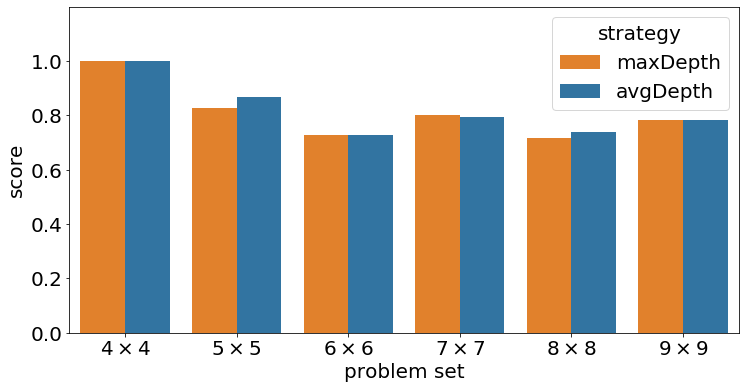

In [98]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
# get max value 
max_scores = df.groupby(['strategy', 'nSim', 'pieces']).agg({'score': 'max'}).reset_index()
max_scores = max_scores.sort_values('strategy', ascending=False)
ax = sns.barplot(x='pieces', y='score', hue='strategy',
                 palette={'maxDepth': "C1", 'avgDepth': "C0"},
                 data=max_scores, ci=None)


ax.set(xlabel='problem set')
xlabels = [r'$4 \times 4$', r'$5 \times 5$', r'$6 \times 6$',
           r'$7 \times 7$', r'$8 \times 8$', r'$9 \times 9$']
ax.set_xticklabels(xlabels)

ax.set(ylim=[0, 1.199])
plt.savefig(images_dir + '/maximum_values.png')

In [91]:
max_scores.sort_values('strategy', ascending=False)

,strategy,nSim,pieces,score
36,maxDepth,100,16,1.000000
64,maxDepth,2000,64,0.687500
69,maxDepth,10000,49,0.795918
68,maxDepth,10000,36,0.722222
67,maxDepth,10000,25,0.800000
...,...,...,...,...
6,avgDepth,200,16,1.000000
5,avgDepth,100,81,0.802469
4,avgDepth,100,64,0.812500
3,avgDepth,100,49,0.816327


In [92]:
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(max_scores)

,strategy,nSim,pieces,score
36,maxDepth,100,16,1.000000
46,maxDepth,200,64,0.734375
52,maxDepth,500,64,0.703125
51,maxDepth,500,49,0.755102
50,maxDepth,500,36,0.750000
49,maxDepth,500,25,0.840000
48,maxDepth,500,16,1.000000
47,maxDepth,200,81,0.802469
45,maxDepth,200,49,0.816327
54,maxDepth,1000,16,1.000000


In [93]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth,pieces,score
0,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,100,6176,0,10,16,0.625000
1,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,100,6176,0,10,16,0.625000
2,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,200,11796,0,10,16,0.625000
3,20-05-12 21:11:12,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,200,11796,0,10,16,0.625000
4,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,500,28633,0,10,16,0.625000
5,20-05-12 21:11:13,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,500,28633,0,10,16,0.625000
6,20-05-12 21:11:14,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,1000,57086,0,10,16,0.625000
7,20-05-12 21:11:15,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,1000,57086,0,10,16,0.625000
8,20-05-12 21:11:17,generate_puzzles2/RandPuzzle4x4_01.txt,4,maxDepth,2000,113398,0,10,16,0.625000
9,20-05-12 21:11:18,generate_puzzles2/RandPuzzle4x4_01.txt,4,avgDepth,2000,113398,0,10,16,0.625000


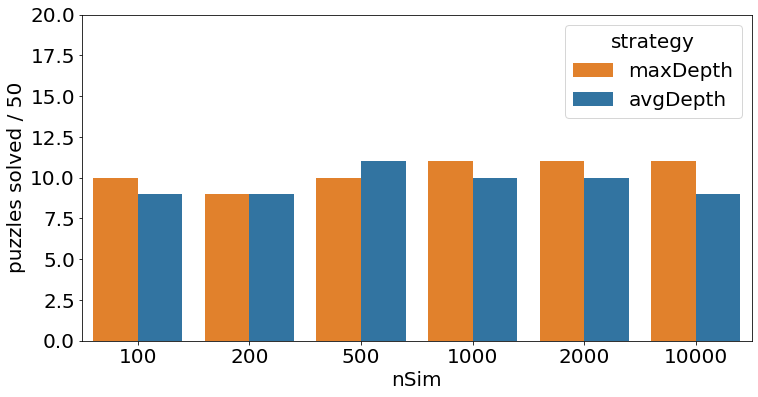

,nSim,strategy,time,filename,rows,piecesPlaced,solution_found,depth,pieces,score
1,100,maxDepth,10,10,10,10,10,10,10,10
3,200,maxDepth,9,9,9,9,9,9,9,9
5,500,maxDepth,10,10,10,10,10,10,10,10
7,1000,maxDepth,11,11,11,11,11,11,11,11
9,2000,maxDepth,11,11,11,11,11,11,11,11
11,10000,maxDepth,11,11,11,11,11,11,11,11
0,100,avgDepth,9,9,9,9,9,9,9,9
2,200,avgDepth,9,9,9,9,9,9,9,9
4,500,avgDepth,11,11,11,11,11,11,11,11
6,1000,avgDepth,10,10,10,10,10,10,10,10


In [96]:
# solutions found in total

_df = df[(df['pieces'] == 16) & (df['solution_found'] == True)].groupby(['nSim', 'strategy']).count()
_df = _df.reset_index()
_df = _df.sort_values('strategy', ascending=False)
#_df.groupby('solution_found')
ax = sns.barplot(x='nSim', y='solution_found', hue='strategy',
                 palette={'maxDepth': 'C1', 'avgDepth': 'C0'},
                 data=_df, ci=None)
ax.set(xlabel='nSim', ylabel='puzzles solved / 50')
ax.set(ylim=[0, 20.0])
plt.savefig(images_dir + '/nsim_vs_solutions.png')
plt.show()
_df

In [29]:
df.count()

time              3606
filename          3606
rows              3606
strategy          3606
nSim              3606
piecesPlaced      3606
solution_found    3606
depth             3606
pieces            3606
score             3606
dtype: int64

In [54]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt


df = pandas.read_csv(
    'results_backtrack.csv',
    #'results.csv',
    delimiter=';', 
    index_col=False,
    names=['time', 'filename', 'rows', 'piecesPlaced', 'duration_ms'])
df['duration'] = df['duration_ms'] / 1000

In [55]:
df

,time,filename,rows,piecesPlaced,duration_ms,duration
0,20-05-30 12:13:14,E_7_1.b6i6,7,10117322,1739,1.739
1,20-05-30 12:15:00,E_7_2.b6i6,7,656385504,102141,102.141
2,20-05-30 12:16:13,E_7_3.b6i6,7,412006944,69362,69.362
3,20-05-30 12:16:46,E_7_4.b6i6,7,181903032,28826,28.826
4,20-05-30 12:19:09,E_8_1.b8i8,8,794187946,138997,138.997
...,...,...,...,...,...,...
475,20-06-03 17:02:43,E_10_5.b14i14,10,616689,140,0.140
476,20-06-03 17:03:50,E_10_6.b11i12,10,250246218,62876,62.876
477,20-06-03 17:03:54,E_10_7.b12i15,10,586659,136,0.136
478,20-06-03 17:03:58,E_10_8.b13i14,10,377029,88,0.088


In [68]:
df['piecesPlaced'].apply(lambda x: x if x > 0 else 2147483647) # integer overflow happened

new_df = df.sort_values('filename')
new_df = df.groupby('filename').agg([('Min' , 'min'), ('Max', 'max'), ('Mean', 'mean')])

In [69]:
new_df

rows          piecesPlaced                            \
                Min Max Mean          Min         Max          Mean   
filename                                                              
E_10_1.b11i11    10  10   10    689507804  2147483647  1.832576e+09   
E_10_10.b12i12   10  10   10     10181559   595355014  2.979073e+08   
E_10_11.b13i13   10  10   10       122152     4784239  2.351894e+06   
E_10_12.b12i13   10  10   10       784452     3444357  2.098651e+06   
E_10_13.b12i12   10  10   10    282795476  1128224873  7.398938e+08   
E_10_14.b12i13   10  10   10       792031    10730541  4.054135e+06   
E_10_15.b11i12   10  10   10     27071455   150667885  7.446063e+07   
E_10_16.b13i13   10  10   10        24524     6336591  2.280697e+06   
E_10_17.b13i13   10  10   10       329664    10890820  3.933415e+06   
E_10_18.b12i13   10  10   10       323646     9052973  3.292834e+06   
E_10_19.b12i13   10  10   10      3200842    23933902  1.210140e+07   
E_10_2.b11i11    10  10   10    120666388  2147483647  1.467374e+09   
E_10_20.b11i14   10  10   10        81873    41379764  1.954421e+07   
E_10_21.b12i13   10  10   10      3349955    29388338  1.288252e+07   
E_10_22.b12i13   10  10   10      5143444    24332397  9.412493e+06   
E_10_23.b12i12   10  10   10      2537129   112256249  5.538763e+07   
E_10_24.b12i12   10  10   10     34675504   471157639  2.369121e+08   
E_10_25.b12i12   10  10   10      5473150   100688865  4.757007e+07   
E_10_26.b12i12   10  10   10      9009915   900959263  3.856817e+08   
E_10_3.b11i11    10  10   10    202974554  2147483647  1.527661e+09   
E_10_4.b11i11    10  10   10     31952843  2147483647  1.390529e+09   
E_10_5.b14i14    10  10   10       323624     3961962  1.396399e+06   
E_10_6.b11i12    10  10   10      5855905   724043542  3.308803e+08   
E_10_7.b12i15    10  10   10         4149      638537  3.901409e+05   
E_10_8.b13i14    10  10   10       377029     4576275  1.836269e+06   
E_10_9.b12i14    10  10   10        97117     3174375  1.107227e+06   
E_7_1.b6i6        7   7    7     10117322   209215254  1.201690e+08   
E_7_2.b6i6        7   7    7    132391684  1272535839  6.754133e+08   
E_7_3.b6i6        7   7    7     19886149   506739053  2.135844e+08   
E_7_4.b6i6        7   7    7     24690168   274388591  1.451879e+08   
E_8_1.b8i8        8   8    8    325598353   968571982  6.417448e+08   
E_9_1.b9i9        9   9    9    497810778  2147483647  1.351514e+09   
E_9_10.b10i10     9   9    9    246669792  1824201483  6.962487e+08   
E_9_11.b9i11      9   9    9      3377971    33303960  1.678477e+07   
E_9_12.b10i10     9   9    9     10037832    88313953  4.388146e+07   
E_9_13.b10i10     9   9    9      1714805    58649705  2.996659e+07   
E_9_14.b9i10      9   9    9     18203991   317435679  1.462970e+08   
E_9_15.b10i10     9   9    9      4094317   248556538  7.392470e+07   
E_9_16.b9i10      9   9    9      5581229   802778466  3.155356e+08   
E_9_17.b9i10      9   9    9     23926147   318325496  1.628621e+08   
E_9_2.b9i9        9   9    9    508895969  2147483647  1.772906e+09   
E_9_3.b11i12      9   9    9       156635     1645606  5.438388e+05   
E_9_4.b9i12       9   9    9        52090     2618054  9.629093e+05   
E_9_5.b10i11      9   9    9      1145232    10724696  7.446328e+06   
E_9_6.b9i10       9   9    9    471234983  2147483647  1.627086e+09   
E_9_7.b9i11       9   9    9      1955710    10073792  5.394169e+06   
E_9_8.b8i9        9   9    9    163649215  2147483647  1.473814e+09   
E_9_9.b9i10       9   9    9     20039890  2147483647  7.679540e+08   

               duration_ms                        duration             \
                       Min       Max        Mean       Min        Max   
filename                                                                
E_10_1.b11i11      9049424  77368508  40142505.5  9049.424  77368.508   
E_10_10.b12i12        2492    146000     73803.9     2.492    146.000   
E_10_11.b13i13          28  

In [70]:
new_df.columns = ['_'.join(col).rstrip('_') for col in new_df.columns.values]

In [71]:

new_df

,rows_Min,rows_Max,rows_Mean,piecesPlaced_Min,piecesPlaced_Max,piecesPlaced_Mean,duration_ms_Min,duration_ms_Max,duration_ms_Mean,duration_Min,duration_Max,duration_Mean
filename,,,,,,,,,,,,
E_10_1.b11i11,10,10,10,689507804,2147483647,1.832576e+09,9049424,77368508,40142505.5,9049.424,77368.508,40142.5055
E_10_10.b12i12,10,10,10,10181559,595355014,2.979073e+08,2492,146000,73803.9,2.492,146.000,73.8039
E_10_11.b13i13,10,10,10,122152,4784239,2.351894e+06,28,1180,559.4,0.028,1.180,0.5594
E_10_12.b12i13,10,10,10,784452,3444357,2.098651e+06,184,794,477.6,0.184,0.794,0.4776
E_10_13.b12i12,10,10,10,282795476,1128224873,7.398938e+08,71399,280865,186228.3,71.399,280.865,186.2283
E_10_14.b12i13,10,10,10,792031,10730541,4.054135e+06,188,2670,993.9,0.188,2.670,0.9939
E_10_15.b11i12,10,10,10,27071455,150667885,7.446063e+07,6902,37709,18770.4,6.902,37.709,18.7704
E_10_16.b13i13,10,10,10,24524,6336591,2.280697e+06,6,1490,545.4,0.006,1.490,0.5454
E_10_17.b13i13,10,10,10,329664,10890820,3.933415e+06,75,2532,955.9,0.075,2.532,0.9559


In [76]:
new_df[['duration_Min', 'duration_Mean', 'duration_Max']]

,duration_Min,duration_Mean,duration_Max
filename,,,
E_10_1.b11i11,9049.424,40142.5055,77368.508
E_10_10.b12i12,2.492,73.8039,146.000
E_10_11.b13i13,0.028,0.5594,1.180
E_10_12.b12i13,0.184,0.4776,0.794
E_10_13.b12i12,71.399,186.2283,280.865
E_10_14.b12i13,0.188,0.9939,2.670
E_10_15.b11i12,6.902,18.7704,37.709
E_10_16.b13i13,0.006,0.5454,1.490
E_10_17.b13i13,0.075,0.9559,2.532


In [75]:
new_df[['duration_Min', 'duration_Mean', 'duration_Max', 'piecesPlaced_Min', 'piecesPlaced_Mean']].to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &  duration\\_Min &  duration\\_Mean &  duration\\_Max &  piecesPlaced\\_Min &  piecesPlaced\\_Mean \\\\\nfilename       &               &                &               &                   &                    \\\\\n\\midrule\nE\\_10\\_1.b11i11  &      9049.424 &     40142.5055 &     77368.508 &         689507804 &       1.832576e+09 \\\\\nE\\_10\\_10.b12i12 &         2.492 &        73.8039 &       146.000 &          10181559 &       2.979073e+08 \\\\\nE\\_10\\_11.b13i13 &         0.028 &         0.5594 &         1.180 &            122152 &       2.351894e+06 \\\\\nE\\_10\\_12.b12i13 &         0.184 &         0.4776 &         0.794 &            784452 &       2.098651e+06 \\\\\nE\\_10\\_13.b12i12 &        71.399 &       186.2283 &       280.865 &         282795476 &       7.398938e+08 \\\\\nE\\_10\\_14.b12i13 &         0.188 &         0.9939 &         2.670 &            792031 &       4.054135e+06 \\\\\nE\\_10\\_15.b11i12 &         6.902 &     

In [77]:
df.mean()

rows            9.354167e+00
piecesPlaced    3.906820e+08
duration_ms     1.334140e+06
duration        1.334140e+03
dtype: float64

In [78]:
len(df)

480

## Analsysi of colors of problems

In [89]:
# analysis of colors of problems
import os
import glob
from collections import Counter

def get_n_colors_for_puzzle(filename):
    inner_colors_map = Counter()
    frame_colors_map = Counter()
    with open(filename) as f:
        for i, line in enumerate(f):
            if 'One single' in line or 'solution sets' in line:
                break
            if i < 3:
                continue
            colors = line.split()
            if '0' in colors:
                if colors[0] == '0' and colors[3] == '0':
                    frame_colors_map[colors[1]] += 1
                    frame_colors_map[colors[2]] += 1
                elif colors[0] == '0' and colors[1] == '0':
                    frame_colors_map[colors[3]] += 1
                    frame_colors_map[colors[2]] += 1
                elif colors[1] == '0' and colors[2] == '0':
                    frame_colors_map[colors[3]] += 1
                    frame_colors_map[colors[0]] += 1
                elif colors[2] == '0' and colors[3] == '0':
                    frame_colors_map[colors[1]] += 1
                    frame_colors_map[colors[0]] += 1
                elif colors[0] == '0':
                    inner_colors_map[colors[2]] += 1
                    frame_colors_map[colors[1]] += 1
                    frame_colors_map[colors[3]] += 1
                elif colors[1] == '0':
                    inner_colors_map[colors[3]] += 1
                    frame_colors_map[colors[0]] += 1
                    frame_colors_map[colors[2]] += 1
                elif colors[2] == '0':
                    inner_colors_map[colors[0]] += 1
                    frame_colors_map[colors[1]] += 1
                    frame_colors_map[colors[3]] += 1
                elif colors[3] == '0':
                    inner_colors_map[colors[1]] += 1
                    frame_colors_map[colors[2]] += 1
                    frame_colors_map[colors[0]] += 1
            else:
                for color in colors:
                    inner_colors_map[color] += 1
                    
            # for color in colors:
            #     if color == '0':
            #         frame_colors_map[color] += 1
                    
        print('frame colors:', frame_colors_map)
        print('inner colors:', inner_colors_map)
        return frame_colors_map, inner_colors_map


for file in glob.glob('generate_puzzles2/RandPuzzle7x7_13.txt'):
    print(file)
    frame_colors_map, inner_colors_map = get_n_colors_for_puzzle(file)
    break

generate_puzzles2/RandPuzzle7x7_13.txt
frame colors: Counter({'3': 16, '1': 16, '2': 16})
inner colors: Counter({'4': 20, '9': 20, '5': 20, '7': 20, '8': 20, '6': 20})


['1', '2', '3', '4', '5', '6', '7', '8', '9']
[0 1 2 3 4 5 6 7 8]


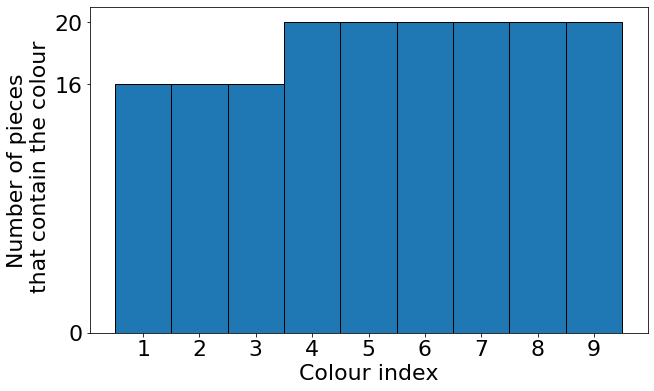

In [104]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
combined_colors = inner_colors_map | frame_colors_map

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (10,6)
labels, values = zip(*combined_colors.items())

labels = list(labels)
labels.sort()
print(labels)
values = list(values)
values.sort()
indexes = np.arange(len(labels))
print(indexes)
width = 1

plt.bar(indexes, values, width, edgecolor='black', linewidth=1)
plt.xticks(indexes, labels)
plt.yticks([0, 16, 20], ['0', '16', '20'])
plt.xlabel('Colour index')
plt.ylabel('Number of pieces\n that contain the colour')
plt.rcParams["figure.figsize"] = (20,3)
file_name = file.split('/')[-1].split('.txt')[0]
plt.savefig(f'images/color_distribution_{file_name}.png')
plt.show()